In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|█████████████████| 8.41M/8.41M [00:01<00:00, 6.22MB/s]


In [2]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [3]:
#read html w pandas
marstemps=pd.read_html("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")
marstemps=marstemps[0]
marstemps

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [4]:
browser.quit()


In [5]:
columns= ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [6]:
#Assemble the scraped data into a Pandas DataFrame.
marstemps_df=pd.DataFrame(marstemps, columns=columns)

marstemps_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
marstemps.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

#Examine the data types of all the DataFrame columns. 
#If necessary, cast (or convert) the data to the appropriate datetime, 
#int, or float data types.
#You can use the Pandas astype and to_datetime methods to accomplish this task.

In [8]:
#Examine the data types of all the DataFrame columns. 
#If necessary, cast (or convert) the data to the appropriate datetime, 
#int, or float data types. #You can use the Pandas astype and to_datetime methods to accomplish this task.

marstemps['terrestrial_date']=pd.to_datetime(marstemps['terrestrial_date'])
marstemps.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
#how many months are on mars?
month_count=max(marstemps['month'])
print(f'There are ', month_count, 'months on mars.')

There are  12 months on mars.


In [10]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
#10 is subtracted because the first line has a sol of 10
sol_count=len(marstemps['sol'])-10
print(f'There are', sol_count,'days on mars.')

There are 1857 days on mars.


In [12]:
#Determining lowest and highest monthly temperatures
#create df
headers=list(marstemps)
mintemp_df=marstemps[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,sol,ls,min_temp,pressure
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
1,2,1175.853933,44.258427,-79.932584,889.455056
4,5,1182.691275,132.885906,-79.308725,748.557047
0,1,1077.574713,15.281609,-77.160920,862.488506
5,6,750.829932,164.897959,-75.299320,745.054422
11,12,990.951807,344.692771,-74.451807,842.156627
6,7,715.105634,194.894366,-72.281690,795.105634
10,11,947.224638,314.536232,-71.985507,857.014493
9,10,1034.669643,286.330357,-71.982143,887.312500


Text(0.5, 1.0, 'Average Minimum Temperatures by Martian Month')

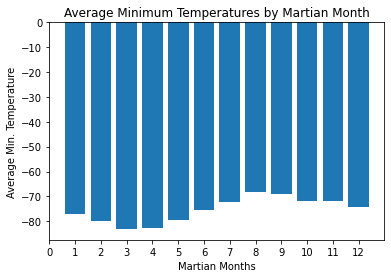

In [47]:
#plot bar chart of monthly temps
tempgraph_df=marstemps[headers[2:]].groupby('month', as_index=False).mean().sort_values('month')
plt.bar(mintemp_df['month'], mintemp_df['min_temp'])
plt.xlabel("Martian Months")
plt.ylabel("Average Min. Temperature")
plt.xticks(np.arange(0,len(mintemp_df['month'])+1, 1))
plt.title('Average Minimum Temperatures by Martian Month')


In [20]:
print('Month 3 has the lowest average temperature, while Month 8 has the highest')

Month 3 has the lowest average temperature, while Month 8 has the highest


In [21]:
#Determining lowest and highest pressures
headers=list(marstemps)
pressures_df=marstemps[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressures_df


,month,sol,ls,min_temp,pressure
5,6,750.829932,164.897959,-75.299320,745.054422
4,5,1182.691275,132.885906,-79.308725,748.557047
6,7,715.105634,194.894366,-72.281690,795.105634
3,4,1244.500000,104.365979,-82.747423,806.329897
11,12,990.951807,344.692771,-74.451807,842.156627
10,11,947.224638,314.536232,-71.985507,857.014493
0,1,1077.574713,15.281609,-77.160920,862.488506
7,8,795.333333,224.347518,-68.382979,873.829787
2,3,1204.406250,75.010417,-83.307292,877.322917
9,10,1034.669643,286.330357,-71.982143,887.312500


Text(0.5, 1.0, 'Average Atmospheric Pressure by Martian Month')

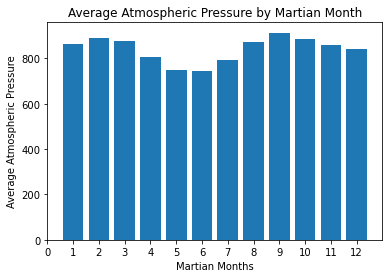

In [66]:
#plot pressures
pressuregraph_df=marstemps[headers[2:]].groupby('month', as_index=False).mean().sort_values('month')
plt.bar(pressuregraph_df['month'], pressuregraph_df['pressure'])
plt.xlabel("Martian Months")
plt.ylabel("Average Atmospheric Pressure")
plt.xticks(np.arange(0,len(pressuregraph_df['month'])+1, 1))
plt.title('Average Atmospheric Pressure by Martian Month')

In [22]:
print('Month 5 has the lowest average pressure, while Month 8 has the highest average pressure')

Month 5 has the lowest average pressure, while Month 8 has the highest average pressure


In [67]:
#How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.
#determine sun's starting longitude
orig_ls=marstemps['ls'].loc[0]
orig_ls

155

In [68]:
#find rows where ls is equal to 155
same_ls=marstemps.loc[marstemps['ls']==orig_ls]
same_ls


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [69]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [72]:
a=same_ls['terrestrial_date'].loc[0]
aftronemarsyr=same_ls['terrestrial_date'].iloc[1]
onemarsyr=aftronemarsyr - a
print(f' In one Martian Year, about ',onemarsyr, 'pass on earth')

 In one Martian Year, about  686 days 00:00:00 pass on earth


Text(0.5, 1.0, 'Daily Minimum Temperature')

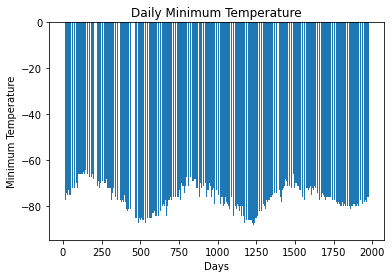

In [74]:
plt.bar(marstemps['sol'],marstemps['min_temp'])
plt.xlabel("Days")
plt.ylabel("Minimum Temperature")
plt.title('Daily Minimum Temperature')

In [75]:
#from the above.graph, we can see about 3 circuits of Mars around the sun in 2000 terrestrial days.
#This implies that one martian year lasts about 666.7 Terrestrial days, giving us only a difference of 
#19.3, which comes out to just under a 3% difference.
